<a href="https://colab.research.google.com/github/vpagonis/EURADOS-2023/blob/main/Code_3_1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# install R package numOSL by Peng et al.
install.packages('numOSL')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



# R-CODE 3.1 FITTING TWO-COMPONENT CW-OSL DATA WITH THE TCGD PACKAGE

The first example below deconvolutes Reference glow curve #1, from
the project GLOCANIN which was an interlaboratory comparison of different
TL deconvolution methods {Bos1993d}. 

In this example the deconvolution method uses the transformed KV-TL equation which is based on the Lambert W-function:


\begin{equation}
I(T)=I_{m}\:\exp\left[-\frac{E}{k\,}\left(\frac{1}{T}-\frac{1}{T_{m}}\right)\right]\,\frac{W[e^{z_{m}}]+W[e^{z_{m}}]^{2}}{W[e^{z}]+W[e^{z}]^{2}}\
\end{equation}

\begin{equation}
z=\frac{R}{1-R}-\ln\left[\frac{1-R}{R}\right]+\frac{k\:T^{2}\:\exp\left[E/\left(kT_{m}\right)\right]}{kT_{m}^{2}(1-1.05\:R^{1.26})}\exp\left[-\frac{E}{k\,T}\right]\;\left(1-\frac{2kT}{E}\right)\
\end{equation}

\begin{equation}
z_{m}=\frac{R}{1-R}-\ln\left[\frac{1-R}{R}\right]+\frac{1-2kT_{m}/E}{1-1.05\:R^{1.26}}\
\end{equation}

where $I_{m}$ is the maximum TL intensity, $T_{m}$ is the correspoding temperature of  maximum TL intensity, $E$ is the activation energy (in eV),  $T$ is the temperature (in K), $\beta$ is the heating rate (in K/s), k$_{B}$ is the Boltzmann constant (in eV.K$^{-1}$) and ${R<1}$, $c>0$.

 The KV-TL equation  was discussed in the Python codes. The best fit parameters are $E$=1.812 eV,  $T_m$=490 K and retrapping ratio $R$=2e-14.

Both the very low value of $R$, and the value of the geometrical shape factor $\mu$=0.43 indicate first order kinetics.

[1] Best fit parameters


,Ithn,seIthn,Lamda,seLamda
Comp.1,58289.77,657.5524,0.17560782,0.0016783102
Comp.2,83985.53,697.0941,0.02776211,0.0004630602



FOM= 7.719809

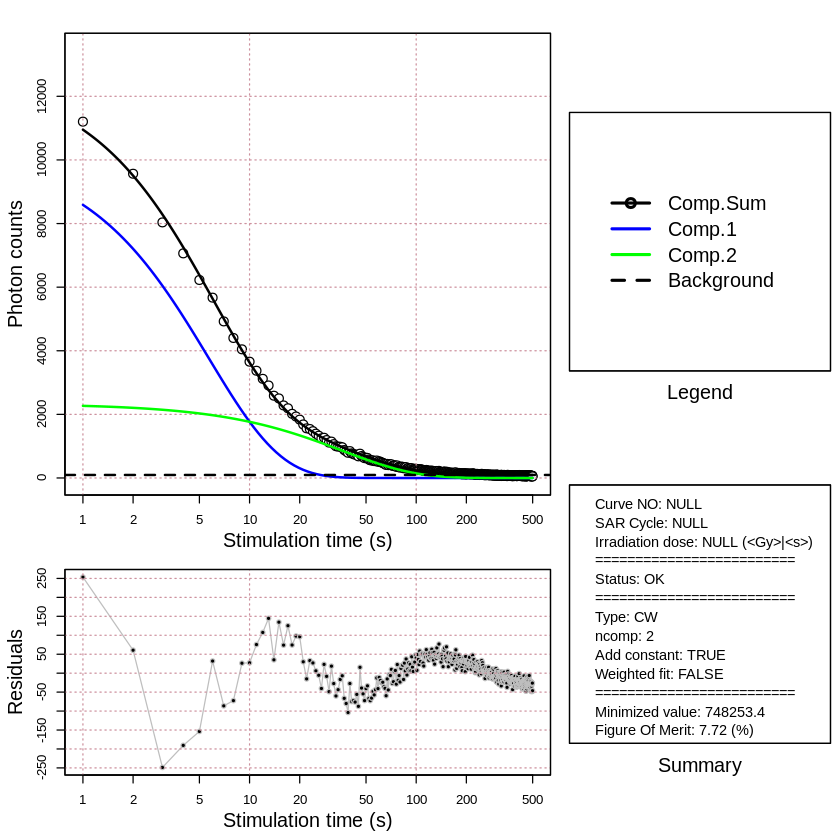

In [6]:
### Fitting CW-OSL signal with package numOSL (2 components)
rm(list=ls())

library("numOSL")

# read data from GitHub

filename <- "https://github.com/vpagonis/EURADOS-2023/raw/main/KST4ph300IR.TXT"
data <-read.table(url(filename))

data<-data.frame(data[2:500,1],data[2:500,2]) #data t=1-500 s

# call decom function in package numOSL
a<-decomp(data, ncomp=2)

# print best fit parammeters and FOM
print.noquote("Best fit parameters")
a$LMpars

cat("\nFOM=",a$FOM)

# R-CODE 3.11 FITTING 3-COMPONENT CW-OSL DATA USING FIRST ORDER KINETICS
This example shows how analyze the same simulated data as in the previous example,  using the mixed order kinetics TL equations (MOK-TL) in the `tgcd` package.

The MOK-TL equation is:

% Preview source code from paragraph 145 to 149

In summary, the following are the transformed MOK-TL equations for
CGCD analysis, in terms of the MOK kinetic parameter $\alpha$ and
the activation energy $E$:

\begin{equation}
I(T)=I_{m}\,\exp\left[\frac{E\,(T-T_{m})}{k\,T\,T_{m}}\right]\,\frac{(F(T_{m})-\alpha)^{2}}{F(T_{m})}\,\frac{F(T)}{(F(T)-\alpha)^{2}}\
\end{equation}

\begin{equation}
F(T)=\exp\left\{ \frac{1}{f_{MOK}}\,\frac{T^{2}}{T_{m}^{2}}\,\exp\left[\frac{E\,(T-T_{m})}{k\,T\,T_{m}}\right]\left(1-\frac{2\,k\,T}{E}\right)\right\} \
\end{equation}

\begin{equation}
f_{MOK}=\frac{2.6-0.9203\,\alpha+0.324\,\alpha^{3.388}}{2.6-2.9203\,\alpha+0.324\,\alpha^{3.338}}\
\end{equation}

The fitting parameters here are $\alpha$, $E$ and the parameters
$I_{m}$, $T_{m}$ can be estimated from the experimental data. 

In this example the best fit values are $E$=1.183 eV, $T_m$=490 K and the best fit MOK parameter is $\alpha$=0.00048.

The very low value of $_alpha$  indicates again that the TL peak follows first order kinetics.

[1] Best fit parameters


,Ithn,seIthn,Lamda,seLamda
Comp.1,44763.64,1219.004,1.83464972,0.059252805
Comp.2,86820.28,11297.000,0.09116339,0.011550567
Comp.3,191063.64,11639.429,0.01385312,0.001722478



FOM= 5.037462

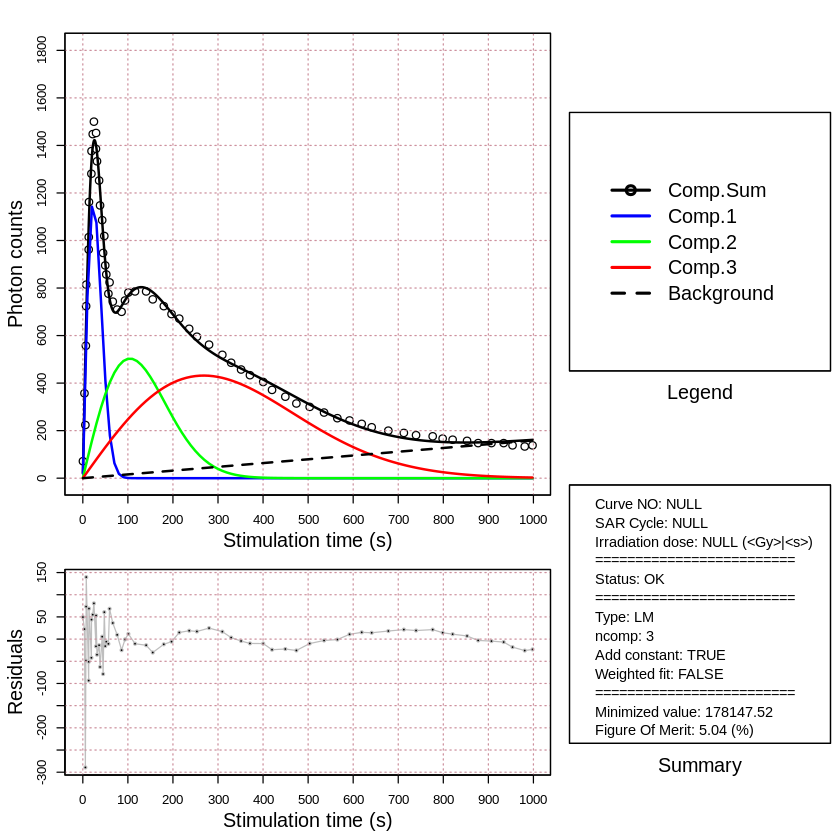

In [7]:
### Example: Analyze LM-OSL signal using package numOSL
rm(list=ls())
library("numOSL")

# Read (x,y) data from two files in GitHub
filename <- "https://github.com/vpagonis/EURADOS-2023/raw/main/CaF2LMx.txt"
CaF2LMx <-read.table(url(filename))

filename <- "https://github.com/vpagonis/EURADOS-2023/raw/main/CaF2LMy.txt"
CaF2LMy <-read.table(url(filename))

d<-data.frame(CaF2LMx,CaF2LMy)

# call decom function in package numOSL
# with 3-components in LM-OSL signal

a<-decomp(d,ncomp=3,typ="lm",log="",
       control.args=list(maxiter=10))

# print best fit parameters and FOM
print.noquote("Best fit parameters")
a$LMpars
cat("\nFOM=",a$FOM)